In [1]:
import sxs 
import qnmfits
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
with open("waveforms_used.txt", "r") as file:
    waveform_ids = file.readlines()
waveform_ids = [line.strip() for line in waveform_ids]
waveform_ids = [wf.split(':')[-1][-4:] for wf in waveform_ids]

sims = {}
for wf in waveform_ids:
    try:
        sims[wf] = qnmfits.SXS(ID=wf, zero_time='norm') # Using peak of total amplitude! 
    except Exception as e:
        print(f"Error processing waveform ID {wf}: {e}")

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0219v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0219v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0226v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0226v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0221v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0221v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0225v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0225v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SX

In [ ]:
C_ratio_33_list = []
C_phase_diff_33_list = []

C_ratio_21_list = []
C_phase_diff_21_list = []

C_ratio_44_list = []
C_phase_diff_44_list = []

T0 = 0
delta_t = 10 

for sim in sims.values():

    tau_22 = qnmfits.qnm.omega_list([(2,2,0,1)], sim.chif_mag, sim.Mf)[0].imag
    tau_21 = qnmfits.qnm.omega_list([(2,1,0,1)], sim.chif_mag, sim.Mf)[0].imag
    tau_32 = qnmfits.qnm.omega_list([(3,2,0,1)], sim.chif_mag, sim.Mf)[0].imag
    tau_44 = qnmfits.qnm.omega_list([(4,4,0,1)], sim.chif_mag, sim.Mf)[0].imag

    best_fit = qnmfits.ringdown_fit(
        sim.times,
        sim.h[2,2],
        [(2,2,0,1)],
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0=T0
    )

    C_mag_22 = np.abs(best_fit['C'])
    C_phase_22 = np.arctan2(best_fit['C'][0].imag, best_fit['C'][0].real)

    best_fit = qnmfits.ringdown_fit(
        sim.times,
        sim.h[3,3],
        [(3,3,0,1)],
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0=T0
    )

    C_mag_33 = np.abs(best_fit['C']) * np.exp(delta_t/tau_22 - delta_t/tau_32)
    C_phase_33 = np.arctan2(best_fit['C'][0].imag, best_fit['C'][0].real)

    best_fit = qnmfits.ringdown_fit(
        sim.times,
        sim.h[2,1],
        [(2,1,0,1)],
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0=T0
    )

    C_mag_21 = np.abs(best_fit['C']) * np.exp(delta_t/tau_22 - delta_t/tau_21)
    C_phase_21 = np.arctan2(best_fit['C'][0].imag, best_fit['C'][0].real)

    best_fit = qnmfits.ringdown_fit(
        sim.times,
        sim.h[4,4],
        [(4,4,0,1)],
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0=T0
    )

    C_mag_44 = np.abs(best_fit['C']) * np.exp(delta_t/tau_22 - delta_t/tau_21)
    C_phase_44 = np.arctan2(best_fit['C'][0].imag, best_fit['C'][0].real)
    
    ### 

    C_ratio_33 = C_mag_33 / C_mag_22
    C_phase_diff_33 = (3/2)*C_phase_22 - C_phase_33

    C_ratio_33_list.append(C_ratio_33)
    C_phase_diff_33_list.append(C_phase_diff_33)

    C_ratio_21 = C_mag_21 / C_mag_22
    C_phase_diff_21 = (1/2)*C_phase_22 - C_phase_21

    C_ratio_21_list.append(C_ratio_21)
    C_phase_diff_21_list.append(C_phase_diff_21)

    C_ratio_44 = C_mag_44 / C_mag_22
    C_phase_diff_44 = (4/2)*C_phase_22 - C_phase_44

    C_ratio_44_list.append(C_ratio_44)
    C_phase_diff_44_list.append(C_phase_diff_44)

NameError: name 'delta_t' is not defined

/tmp/ipykernel_665916/383057502.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


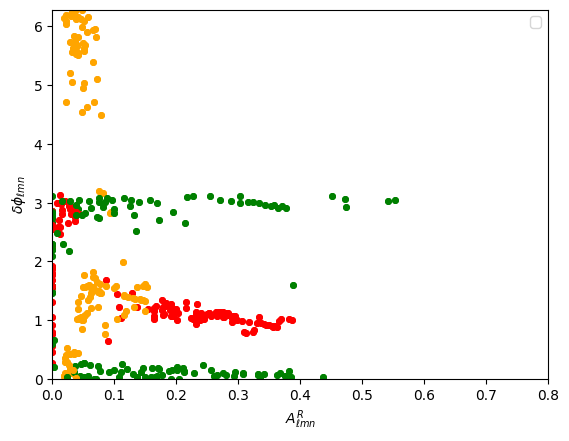

In [30]:
fig, ax = plt.subplots()

for i, wf in enumerate(sims.keys()):
    ax.plot(C_ratio_33_list[i], np.mod(C_phase_diff_33_list[i], np.pi), 'o', markersize=4, color='red')
    ax.plot(C_ratio_33_list[i], np.mod(C_phase_diff_33_list[i], np.pi), 'o', markersize=4, color='red')
    ax.plot(C_ratio_21_list[i], np.mod(C_phase_diff_21_list[i], np.pi), 'o', markersize=4, color='green')
    ax.plot(C_ratio_21_list[i], np.mod(C_phase_diff_21_list[i], np.pi), 'o', markersize=4, color='green')
    ax.plot(C_ratio_44_list[i], np.mod(C_phase_diff_44_list[i], 2*np.pi), 'o', markersize=4, color='orange')
    ax.plot(C_ratio_44_list[i], np.mod(C_phase_diff_44_list[i], 2*np.pi), 'o', markersize=4, color='orange')

ax.set_xlabel(r"$A_{\ell m n}^R$")
ax.set_ylabel(r"$\delta \phi_{\ell m n}$")
ax.set_xlim(0, 0.8) 
ax.set_ylim(0, 2*np.pi)

ax.set_xlim(left=0)

ax.legend() 
plt.show()